In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_csv('/content/heart_2020_.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.shape

(319795, 18)

#Description of dataset

The dataset has 319795 rows and 18 columns. The explanation of the columns is-

1.HeartDisease : Respondents that have
ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

2.BMI : Body Mass Index (BMI).

3.Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).

4.AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

5.Stroke : (Ever told) (you had) a stroke?

6.PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

7.MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

8.DiffWalking : Do you have serious difficulty walking or climbing stairs?

9.Sex : Are you male or female?

10.AgeCategory: Fourteen-level age category.

11.Race : Imputed race/ethnicity value.

12.Diabetic : (Ever told) (you had) diabetes?

13.PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

14.GenHealth : Would you say that in general your health is...

15.SleepTime : On average, how many hours of sleep do you get in a 24-hour period?

16.Asthma : (Ever told) (you had) asthma?

17.KidneyDisease : Not including kidney stones, bladder infection or

incontinence, were you ever told you had kidney disease?

18.SkinCancer : (Ever told) (you had) skin cancer?




In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


#DATA WRANGLING AND DATA ENCODING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#checking the null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values

In [ ]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

Checking the count of unique values in numeric columns

In [ ]:
df.value_counts('Diabetic')

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
dtype: int64

In [ ]:
df.value_counts('GenHealth')

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
dtype: int64

In [ ]:
df.value_counts('Race')

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
dtype: int64

Majority of people in the dataset are white

In [ ]:
df.value_counts('AgeCategory')

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
dtype: int64

-Converting categorical values into numerical values for analysis

In [ ]:
replace_dictionary = {'Yes':1 , 'No':0 , 'No, borderline diabetes':0 , 'Yes (during pregnancy)':1 ,'Male':1 , 'Female':0}
df = df.replace(replace_dictionary)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

#VISUALISATION

<Figure size 1200x600 with 0 Axes>

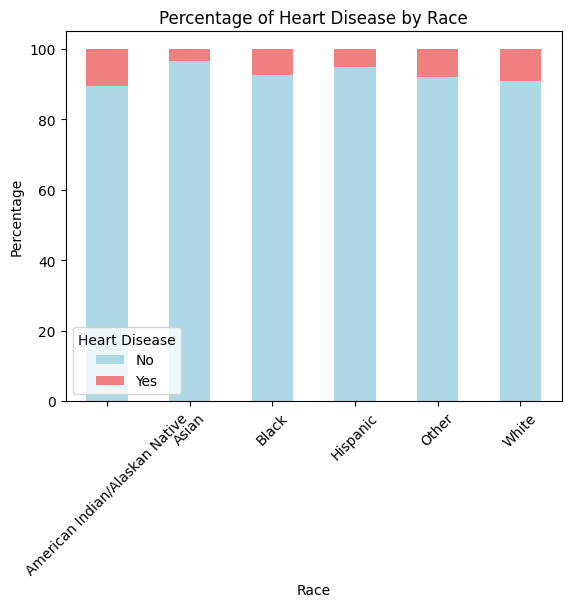

In [ ]:
# Group the data by 'Race' and 'HeartDisease', and calculate the percentage of each group
race_heartdisease_counts = df.groupby(['Race', 'HeartDisease']).size().unstack()
race_heartdisease_percentages = race_heartdisease_counts.div(race_heartdisease_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
race_heartdisease_percentages.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Percentage of Heart Disease by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

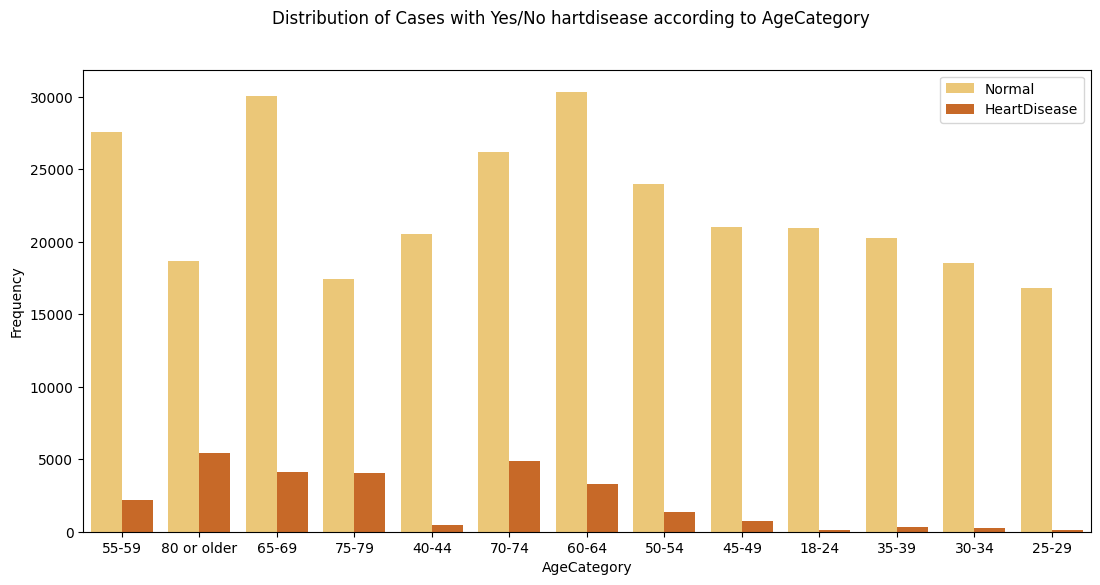

In [ ]:
# Create a countplot using Seaborn
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

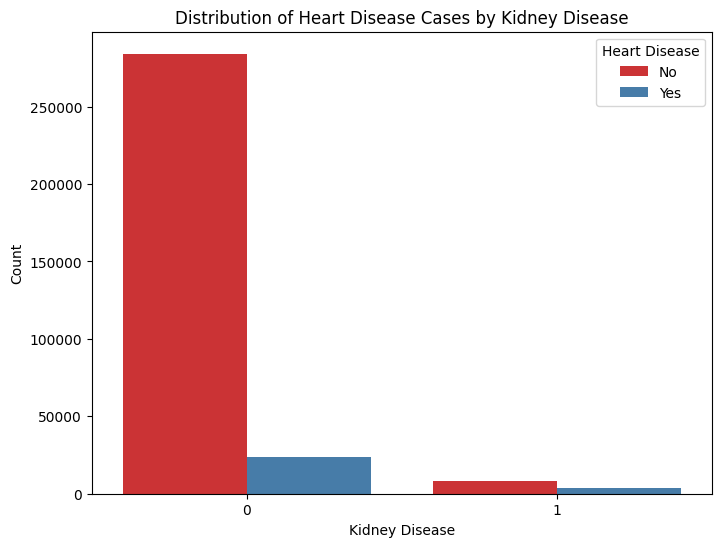

In [ ]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease', palette='Set1')
plt.title('Distribution of Heart Disease Cases by Kidney Disease')
plt.xlabel('Kidney Disease')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

<ipython-input-18-6bfe7112abf6>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 1]["SleepTime"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
<ipython-input-18-6bfe7112abf6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 0]["SleepTime"], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)


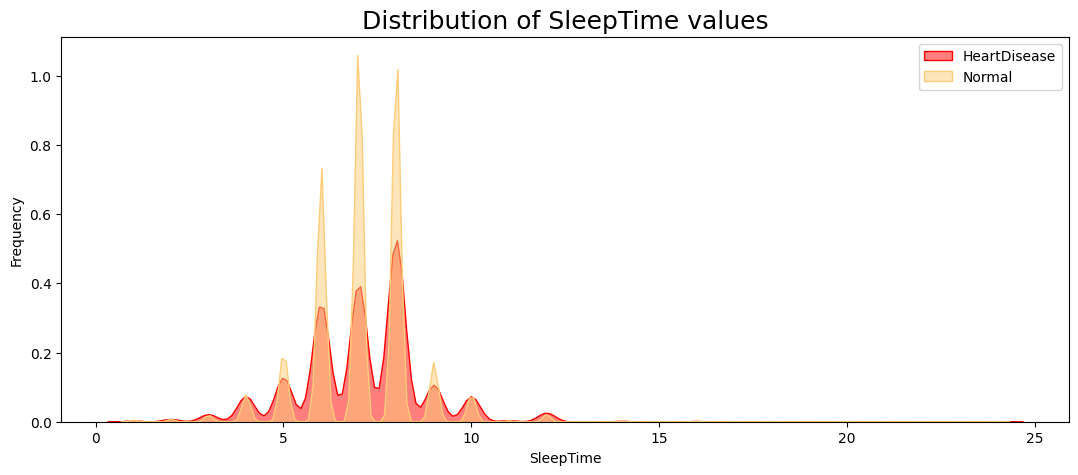

In [ ]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(13, 5))

# Plot the KDE for individuals with heart disease (HeartDisease=1)
sns.kdeplot(df[df["HeartDisease"] == 1]["SleepTime"], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)

# Plot the KDE for individuals without heart disease (HeartDisease=0)
sns.kdeplot(df[df["HeartDisease"] == 0]["SleepTime"], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)

# Set the title, labels, and legend
plt.title('Distribution of SleepTime values', fontsize=18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend()

# Show the plot
plt.show()


People with heart disease tends to sleep less

<ipython-input-19-d05374e4d7c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


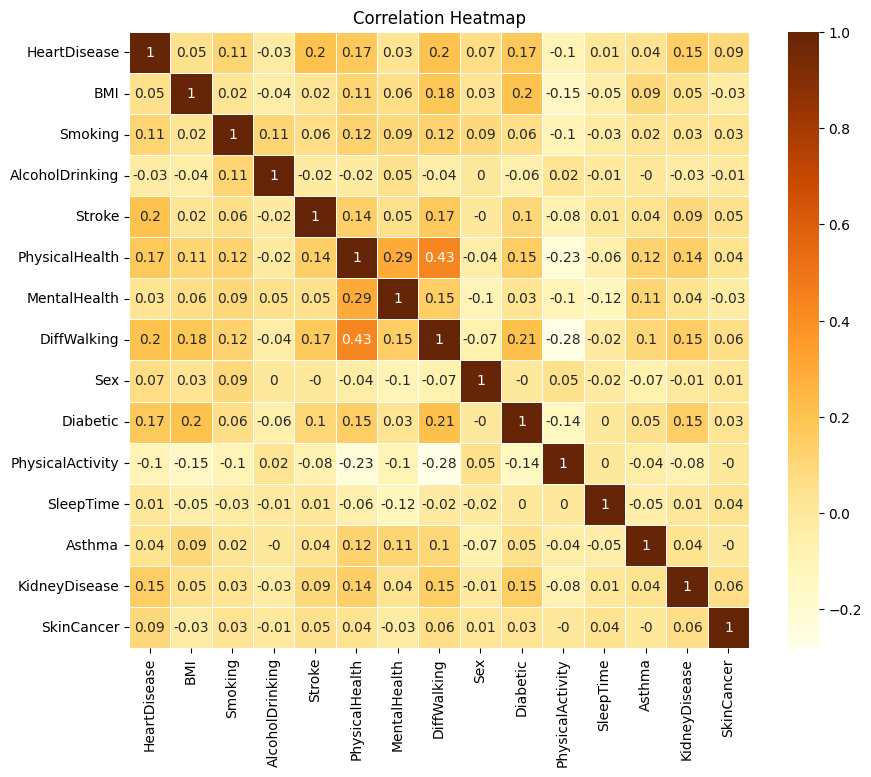

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Independant variables are not highly correlated with each other which is a good sign.

#DATA PREPROCESSING


converting categorical columns to encoded columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the columns to one-hot encode and the numerical columns
categorical_cols = ['AgeCategory', 'Race', 'GenHealth']
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != 'HeartDisease']

# Create transformers for one-hot encoding and standard scaling
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Now you can apply the preprocessor to your data
X_preprocessed = preprocessor.fit_transform(df)

# X_preprocessed now contains the one-hot encoded and scaled features


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Split the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


#K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with a specified number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9028283744273675


In [ ]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for knn:")
print(confusion)


Confusion Matrix for knn:
[[56999  1368]
 [ 4847   745]]


#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier with a maximum depth
max_depth = 5  # Adjust this value to set the desired maximum depth
decision_tree = DecisionTreeClassifier(max_depth=max_depth)

# Fit the Decision Tree classifier to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree.predict(X_test)

# Calculate the accuracy of the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print("Decision Tree Accuracy:", accuracy_decision_tree)


Decision Tree Accuracy: 0.9133194702856517


In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_decision_tree)
print('confusion matrix for decision tree\n',cm)

confusion matrix for decision tree
 [[58216   151]
 [ 5393   199]]


In [ ]:
feature_names = df.columns.tolist()

#Visualising the decision tree

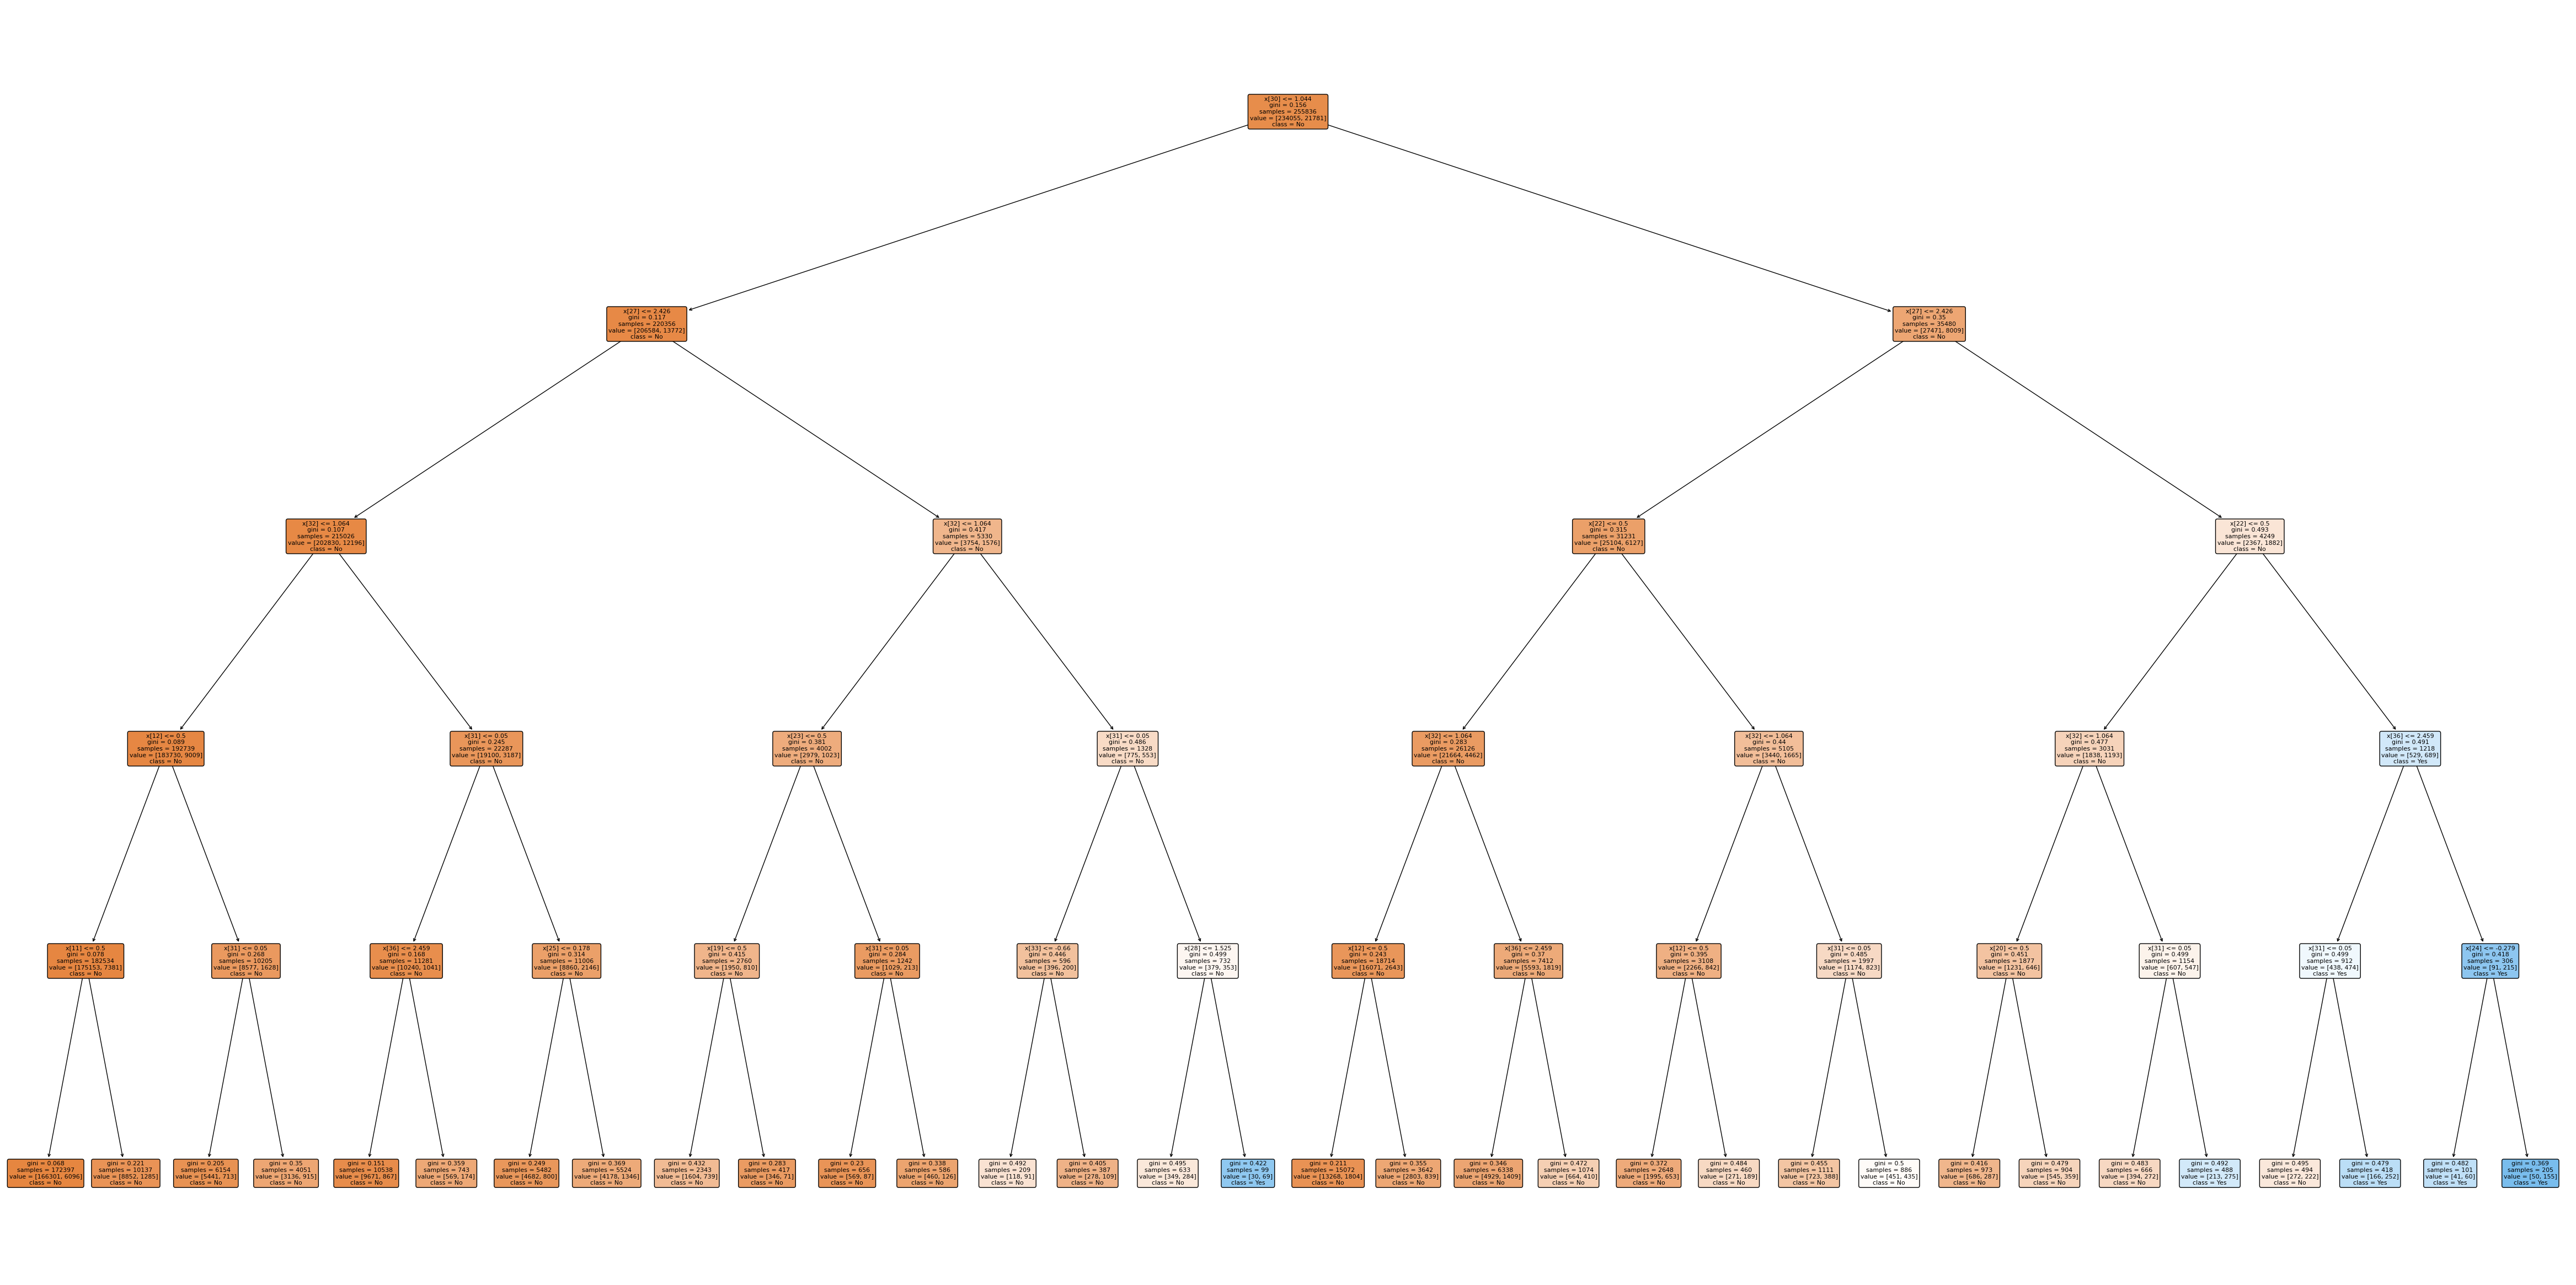

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))
plot_tree(decision_tree, filled=True, rounded=True, class_names=['No', 'Yes'])
plt.show()
# Show the Decision Tree plot
plt.show()
